# Week 6

## Corpus

We are going to look at a set of three playlists. They are called:

'Old School Reggae Roots 70s/80s' (300 tracks)<br>
'Heavy roots dub reggae' (317 tracks)<br>
'DEEP MEDi MUSIK & Tempa Records .. deep' (617 tracks)

These are all playlists of styles of music that are somhow connected. The theory is that dub (2nd playlist) evolved from reggae (1st playlist), and dupstep (3rd playlist) evolved from dub. Therefore these three playlist represent the 'evolution of reggae into dubstep'. 

Note: We are not talking about the 'brostep' genre, commonly referred to as dubstep. brostep artists include Skrillex and Datsik.

## Preliminary Hypotheses

We want to see if we can somehow find a 'shift' in these playlists. That is, the distribution of Spotify's features of these three playlists follow some path. 

We can see for example, that reggae is traditionally played on acoustic or amplified musical intruments, dub songs are often a re-mix of the individual tracks of a reggae song, using a lot of (analogue) effects, and dubstep is usually entirely electronically/digitally produced. Because of this, we expect to see some decrease in the 'acousticness' feature in these playlists.

We can also argue that the instrumentalness will increase. Reggae usually has vocals, where dubstep typically doesn't.

TODO: MORE FEATURES

Imports

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy_credentials import *

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns

from IPython.display import Image

import pandas as pd

sns.set(rc={'figure.figsize':(11.7,8.27)})

We need to use the credentials of our Spotify account to connect to the API. We use a wrapper called spotipy to do this. I've stored my credentials in a python file called `spotipy_credentials.py` (see import above). Edit that file so it contains your credentials.

In [9]:
client_credentials_manager = SpotifyClientCredentials(
    client_id = SPOTIPY_CLIENT_ID,
    client_secret = SPOTIPY_CLIENT_SECRET
)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

We are going to look at some playlists. We want to bbe able to see the features of all tracks in a playlist. To do this we create a function to find all these features.

In [3]:
def get_playlist_features(playlist, tracks_per_iteration = 50):
    """" func: get_playlist_features
        args:
            playlist: the result of a spotify query, specifically one of the 'items' under the 
                'playlist' field
            tracks_per_iteration: amount of tracks per iteration, recommended to keep at 50
                (values greater than 50  will not work)
        returns:
            features:
                a list of dicts containing spotify's features, one per track
    """
    n = 0
    
    features = []
    while True:
        # get the next batch of tracks
        tracks = sp.playlist_tracks(playlist["id"], limit=tracks_per_iteration, offset=n)
        
        # stop if we can't find more tracks
        if not len(tracks["items"]):
            break
        
        # find the ids of these tracks
        track_ids = []
        for i in range(len(tracks["items"])):
            # check if id is valid
            if tracks["items"][i]["track"]["id"]:
                track_ids.append(tracks["items"][i]["track"]["id"])
                
        # add the features of these tracks to the features list
        features += sp.audio_features(track_ids)
        
        # prepare for next batch
        n += tracks_per_iteration
    
    return features


In [4]:
### Getting data from API
# Playlist 1
q1 = "old school reggae roots"
playlist1 = sp.search(q1, type="playlist", limit=1)["playlists"]["items"][0]

pl1 = playlist1['name']
print(f"Playlist analysis: {pl1}, with {playlist1['tracks']['total']} tracks")

df1 = pd.DataFrame(get_playlist_features(playlist1))


# Playlist 2
q2 = "heavy dub roots reggae"
playlist2 = sp.search(q2, type="playlist", limit=1)["playlists"]["items"][0]

pl2 = playlist2['name']
print(f"Playlist analysis: {pl2}, with {playlist2['tracks']['total']} tracks")

df2 = pd.DataFrame(get_playlist_features(playlist2))


# Playlist 3
q3 = "deep medi musik"
playlist3 = sp.search(q3, type="playlist", limit=1)["playlists"]["items"][0]

pl3 = playlist3['name']
print(f"Playlist analysis: {pl3}, with {playlist3['tracks']['total']} tracks")

df3 = pd.DataFrame(get_playlist_features(playlist3))

df3.head()

Playlist analysis: Old School Reggae Roots 70s/80s, with 300 tracks
Playlist analysis: Heavy Dub Roots Reggae, with 835 tracks
Playlist analysis: DEEP MEDi MUSIK & Tempa Records .. deep, with 617 tracks


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.748,0.721,0,-8.717,0,0.0538,0.002190,0.606,0.181,0.504,139.992,audio_features,26jDjZ9LXtiWlbDwRHwJD8,spotify:track:26jDjZ9LXtiWlbDwRHwJD8,https://api.spotify.com/v1/tracks/26jDjZ9LXtiW...,https://api.spotify.com/v1/audio-analysis/26jD...,294853,4
1,0.759,0.472,11,-17.413,0,0.0660,0.091400,0.865,0.253,0.917,142.970,audio_features,1RtsJXVXDVvISNzrc0WohD,spotify:track:1RtsJXVXDVvISNzrc0WohD,https://api.spotify.com/v1/tracks/1RtsJXVXDVvI...,https://api.spotify.com/v1/audio-analysis/1Rts...,284453,4
2,0.927,0.289,0,-12.240,1,0.5530,0.366000,0.888,0.330,0.377,139.971,audio_features,4icnCijYoAPl1DevVpatAz,spotify:track:4icnCijYoAPl1DevVpatAz,https://api.spotify.com/v1/tracks/4icnCijYoAPl...,https://api.spotify.com/v1/audio-analysis/4icn...,249467,4
3,0.869,0.576,5,-10.527,0,0.1470,0.000836,0.685,0.411,0.257,147.014,audio_features,41GZiQAvgzSCXLhIWVJfMB,spotify:track:41GZiQAvgzSCXLhIWVJfMB,https://api.spotify.com/v1/tracks/41GZiQAvgzSC...,https://api.spotify.com/v1/audio-analysis/41GZ...,318587,4
4,0.696,0.734,7,-9.310,1,0.0533,0.032100,0.908,0.464,0.595,139.953,audio_features,5f7ZWdkpQ05topF1yGPBwB,spotify:track:5f7ZWdkpQ05topF1yGPBwB,https://api.spotify.com/v1/tracks/5f7ZWdkpQ05t...,https://api.spotify.com/v1/audio-analysis/5f7Z...,374880,4


Now that we've loaded all the features in our playlist, we want to visually analyze the results. We define a list with all the features we want to look at.

In [5]:
# list of features to look at, including the range these values will be in (used later)
interesting_features = [
    ['danceability', 0, 1],
    ['energy', 0, 1],
    ['speechiness',0, 1],
    ['acousticness', 0, 1],
    ['duration_ms', 0, 1000000],
    ['instrumentalness', 0, 1],
    ['liveness', 0, 1],
    ['valence', 0, 1],
    ['tempo', 20, 220],
    ['loudness', -20, 0]
]

For each feature, we make a plot showing the distribution for each playlist, also showing the mean of the data

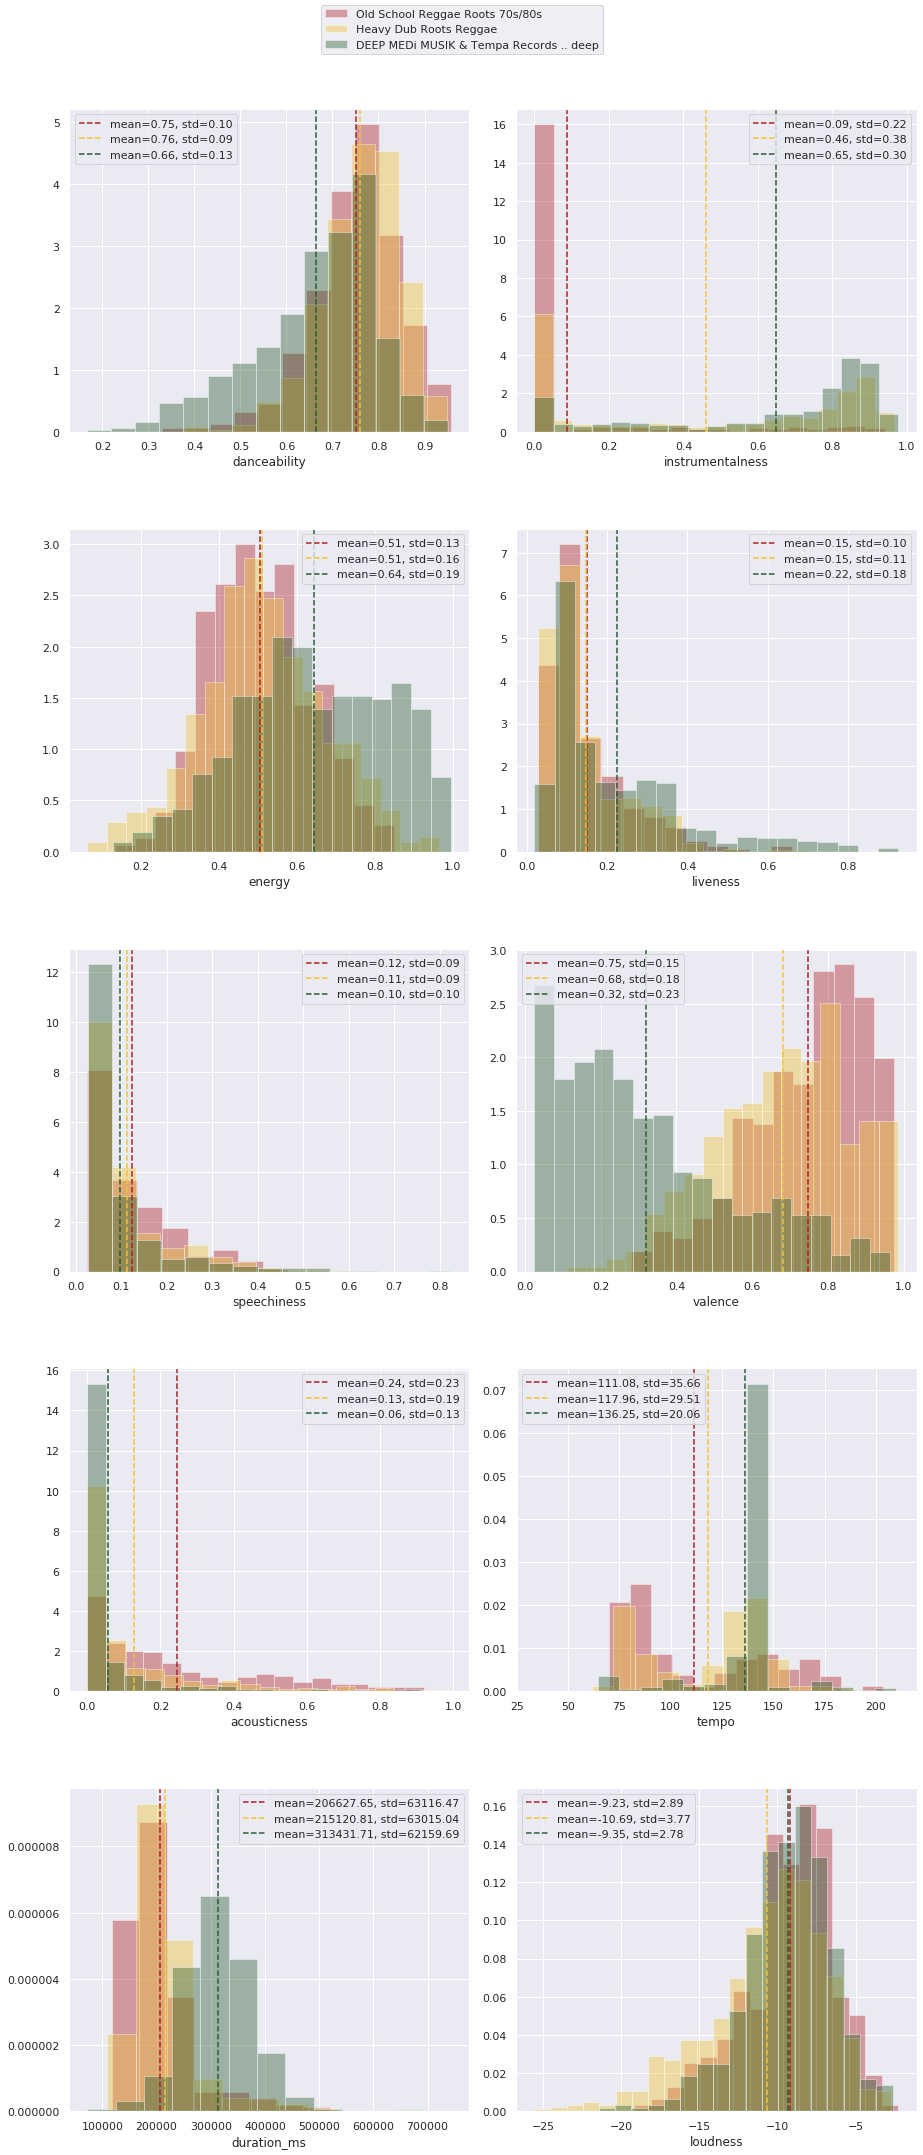

In [6]:
### Plots
sns.set(rc={'figure.figsize':(13,30)})
fig, axs = plt.subplots(5, 2)

for i in range(5):
    for j in range(2):
        feature, minv, maxv = interesting_features[i + (5*j)]
        # define the bin width, so the bins will be the same size for the 
        # different playlists
        binwidth = abs(maxv - minv)/20
        
        sns.distplot(
            df1[feature], label=pl1, ax=axs[i, j], color="#ae1d26",
            # calculate amount of bins based on binwidth defined earlier:
            bins=int(abs(df1[feature].max() - df1[feature].min())/binwidth), 
            kde=False, norm_hist=True
        )
        sns.distplot(
            df2[feature], label=pl2, ax=axs[i, j], color="#f0c435",
            # calculate amount of bins based on binwidth defined earlier:
            bins=int(abs(df2[feature].max() - df2[feature].min())/binwidth),
            kde=False, norm_hist=True
        )
        sns.distplot(
            df3[feature], label=pl3, ax=axs[i, j], color="#275d2e",
            # calculate amount of bins based on binwidth defined earlier:
            bins=int(abs(df3[feature].max() - df3[feature].min())/binwidth),
            kde=False, norm_hist=True
        )
        
        # represent the means of the data as vertical dashed lines
        l1 = axs[i, j].axvline(df1[feature].mean(), ls='--', color="#ae1d26")
        l2 = axs[i, j].axvline(df2[feature].mean(), ls='--', color="#f0c435")
        l3 = axs[i, j].axvline(df3[feature].mean(), ls='--', color="#275d2e")
        axs[i, j].legend(
            (l1, l2, l3), (
                f"mean={df1[feature].mean():.2f}, std={df1[feature].std():.2f}",
                f"mean={df2[feature].mean():.2f}, std={df2[feature].std():.2f}",
                f"mean={df3[feature].mean():.2f}, std={df3[feature].std():.2f}"
            )
        )

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.subplots_adjust(hspace = 0.3, top=0.95)
# axs[0, 1].legend()

From visual inspection, we can already draw some preliminary conclusions. We can see that our hypotheses had some meaning. 

The acousticness does seem to decrease, with the mean going from 0.24 $\rightarrow$ 0.13 $\rightarrow$ 0.06. 

The intrumentalness also has a remarkable path. Reggae has a very low score (mean of 0.09), meaning it has a lot of vocals. Dub is significantly more instrumental with a mean score of 0.46, Dubstep is even more intrumental with a mean score of 0.65.

TODO: MORE FEATURES

### Statistical Significance

To verify our conclusions we have to look at some degree of statistical significance. For now we will look at how 'far', that is, how many standard deviations the mean of the scores for one playlist lies from another. We check all of these at once and store them in a table.

Here, negative values mean 'less' and positive values mean 'more' (negative value can mean: reggae is less danceable than dub).

In [7]:
### Significance

# take the means and standard deviations, and make those values the columns so we can 
# perform vector operations on them
agg1 = df1.agg(["mean", "std"]).T
agg2 = df2.agg(["mean", "std"]).T
agg3 = df3.agg(["mean", "std"]).T

# check how many standard deviations two genres lie from eachother
significance = pd.DataFrame({
    "reggae - dub":     (agg1["mean"] - agg2["mean"]) / agg1["std"],
    "reggae - dubstep": (agg1["mean"] - agg3["mean"]) / agg1["std"],
    "dub - reggae":     (agg2["mean"] - agg1["mean"]) / agg2["std"],
    "dub - dubstep":    (agg2["mean"] - agg3["mean"]) / agg2["std"],
    "dubstep - reggae": (agg3["mean"] - agg1["mean"]) / agg3["std"],
    "dubstep - dub":    (agg3["mean"] - agg2["mean"]) / agg3["std"]
})

significance

,reggae - dub,reggae - dubstep,dub - reggae,dub - dubstep,dubstep - reggae,dubstep - dub
danceability,-0.099909,0.911800,0.111814,1.132267,-0.657968,-0.730064
energy,-0.049339,-1.082028,0.039662,-0.830140,0.731257,0.697913
key,-0.095690,-0.050422,0.097288,0.046024,0.049198,-0.044169
loudness,0.505994,0.041216,-0.388126,-0.356511,-0.042811,0.482762
mode,0.455316,0.416442,-0.392685,-0.033527,-0.360884,0.033688
speechiness,0.115933,0.283908,-0.116523,0.168830,-0.261988,-0.155006
acousticness,0.504233,0.817983,-0.609319,0.379138,-1.451950,-0.556918
instrumentalness,-1.696369,-2.551689,0.990710,-0.499522,1.858178,0.622856
liveness,0.006123,-0.756633,-0.005846,-0.728227,0.431191,0.434680
valence,0.428321,2.768620,-0.374611,2.046837,-1.865178,-1.576625


Here we can see our preliminary conclusions were infact somewhat meaningful.

Dub is somewhat less acoustic than reggae (value of -0.61, meaning 0.61 standard deviations below the mean), and dubstep is somewhat less acoustic than dub (value of -0.56).

Reggae is a lot less instrumental than dub (value of -1.70), and dub is a somewhat less intrumental than dubstep (value of -0.50).

TODO: MORE FEATURES

### Iconic tracks

Just for fun, we are also going to look at what the most typical/iconic tracks are according to each playlist. We'll do this by calculating some distance measure for each track to the 'golden standard' for that playlist, defined by the feature vector consisting of the means.

We will use euclidean distance

In [8]:
distance_features = [
    "danceability", 
     "energy", 
     "speechiness", 
     "acousticness", 
     "instrumentalness", 
     "liveness", 
     "valence"
]

def most_iconic_track(df):
    golden_standard = df[distance_features].mean()

    # euclidean distance:
    df["distance"] = (df[distance_features] - golden_standard).pow(2).sum(axis=1).pow(0.5)
    closest_song_id = df[df['distance'] == df['distance'].min()]["id"].values[0]

    closest_track = sp.track(closest_song_id)
    return closest_track['name'], closest_track['artists'][0]['name']

track, artist = most_iconic_track(df1)
print(f"The most iconic reggae track is: '{track}' by '{artist}'")

track, artist = most_iconic_track(df2)
print(f"The most iconic dub track is: '{track}' by '{artist}'")

track, artist = most_iconic_track(df3)
print(f"The most iconic dubstep track is: '{track}' by '{artist}'")


The most iconic reggae track is: 'Long Shot Bus Me Bet' by 'The Pioneers'
The most iconic dub track is: 'Taxi to Baltimore Dub' by 'Scientist'
The most iconic dubstep track is: 'Wobble That Gut' by 'Skream'
